In [2]:
import pandas as pd 

df = pd.read_csv("netflix_titles_CLEANED.csv")

df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   directors     6173 non-null   object
 4   cast          7982 non-null   object
 5   countries     7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,directors,cast,countries,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,746,1714,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,110,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [3]:
df[['type', 'directors']].isnull().groupby(df['type']).sum()

,type,directors
type,,
Movie,0,188
TV Show,0,2446


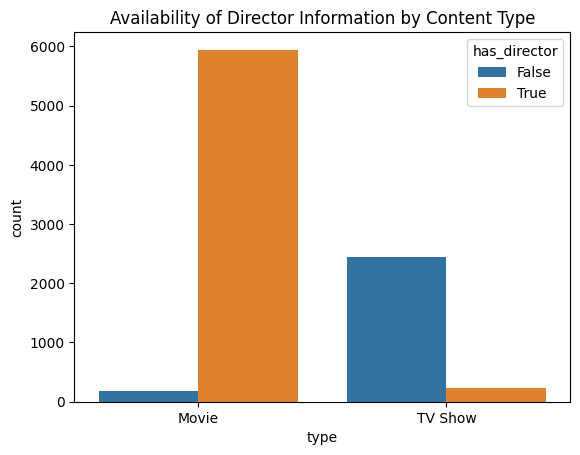

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df['has_director'] = df['directors'].notnull()

sns.countplot(data=df, x='type', hue='has_director')
plt.title("Availability of Director Information by Content Type")
plt.show()

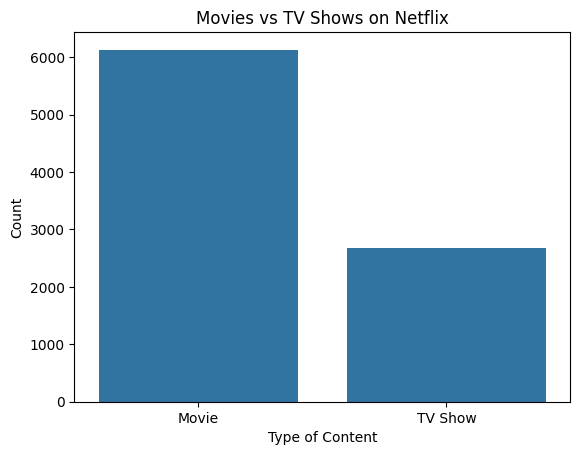

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

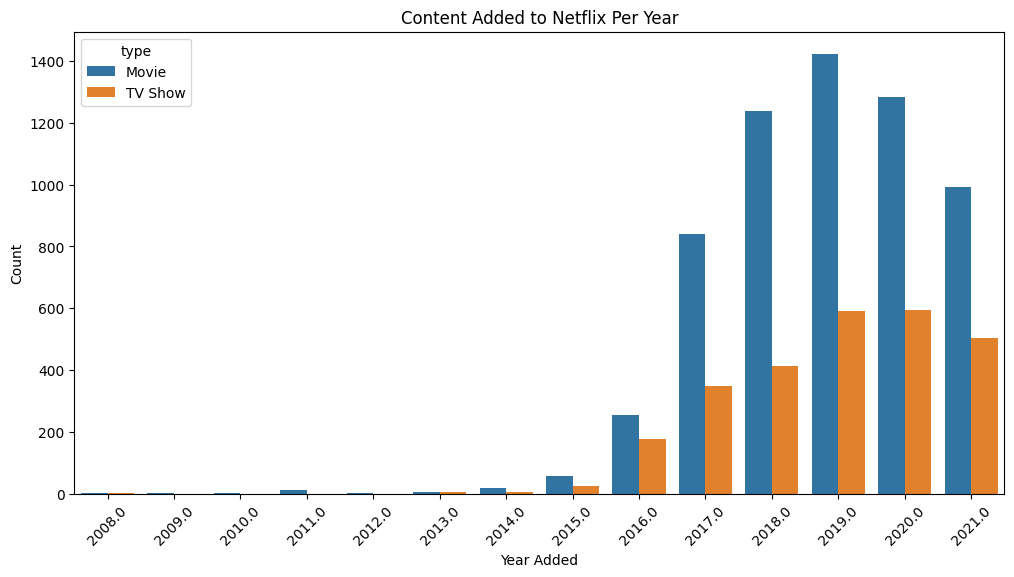

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_added', hue='type')
plt.title("Content Added to Netflix Per Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [8]:
content_by_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
content_by_year

type,Movie,TV Show
year_added,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0
2013.0,6,5
2014.0,19,5
2015.0,56,26
2016.0,253,176


In [9]:
genre_df = df.copy()

# Split genres into a list
genre_df['genre_list'] = genre_df['listed_in'].str.split(', ')

# Explode so each genre becomes its own row
genre_exploded = genre_df.explode('genre_list')

In [10]:
genre_counts = genre_exploded['genre_list'].value_counts().head(15)
genre_counts

genre_list
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64

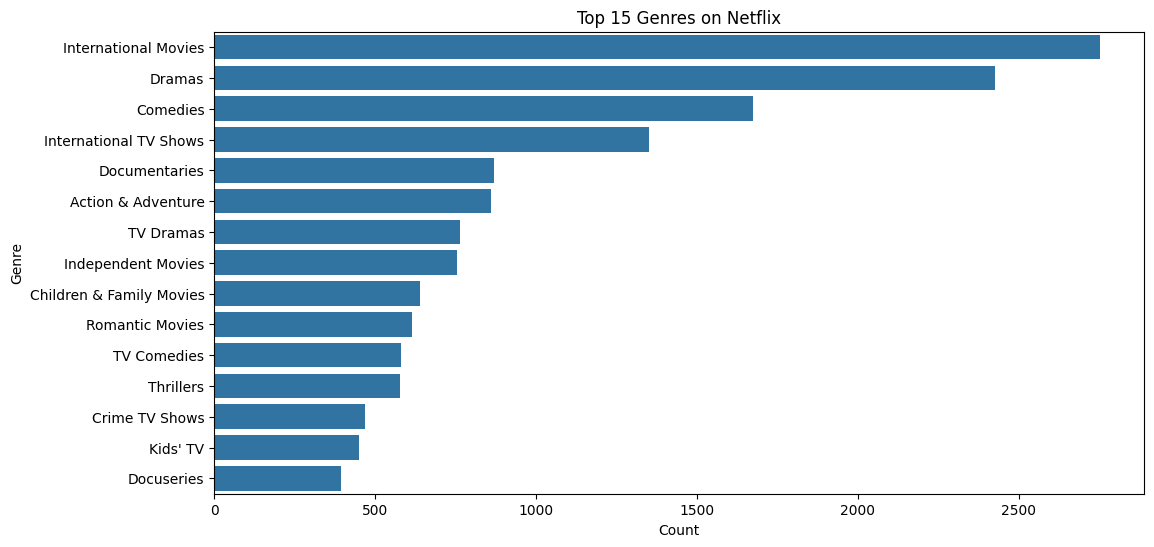

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()